### Given the following data, which specify classifications for nine combinations of VAR1 and VAR2 predict a classification for a case where VAR1=0.906 and VAR2=0.606, using the result of k- means clustering with 3 means (i.e., 2 centroids) calculate the precision, recall and F1 score of the above classification method

#### VAR1,	VAR2,  CLASS
#### 1.713	1.586	0
#### 0.180	1.786	1
#### 0.353	1.240	1
#### 0.940	1.566	0
#### 1.486	0.759	1
#### 1.266	1.106	0
#### 1.540	0.419	1
#### 0.459	1.799	1
#### 0.773	0.186	1


C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Predicted class for VAR1=0.906, VAR2=0.606: 1
Cluster centers (scaled):
[[ 0.63773861  0.46236393]
 [ 0.56239043 -1.26270855]
 [-1.20012903  0.80034462]]


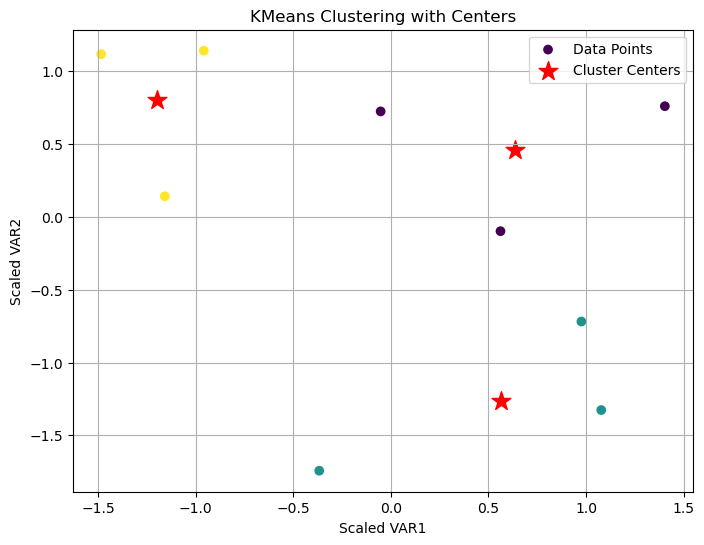

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0


In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt

# Data preparation
data = np.array([
    [1.713, 1.586],
    [0.180, 1.786],
    [0.353, 1.240],
    [0.940, 1.566],
    [1.486, 0.759],
    [1.266, 1.106],
    [1.540, 0.419],
    [0.459, 1.799],
    [0.773, 0.186]
])

true_labels = np.array([0, 1, 1, 0, 1, 0, 1, 1, 1])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0, init='random').fit(data_scaled)
cluster_labels = kmeans.labels_

# Predict class for new data point
new_case = np.array([[0.906, 0.606]])
new_case_scaled = scaler.transform(new_case)  
predicted_cluster = kmeans.predict(new_case_scaled)[0]

# Map clusters to the most common class
cluster_to_class = {}
for cluster in np.unique(cluster_labels):
    cluster_to_class[cluster] = pd.Series(true_labels[cluster_labels == cluster]).mode()[0]

predicted_class = cluster_to_class[predicted_cluster]
print(f"Predicted class for VAR1=0.906, VAR2=0.606: {predicted_class}")

# Print cluster centers
print("Cluster centers (scaled):")
print(kmeans.cluster_centers_)

# Visualizing the data and cluster centers
plt.figure(figsize=(8, 6))

# Plotting the data points
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='*', label='Cluster Centers')

plt.title('KMeans Clustering with Centers')
plt.xlabel('Scaled VAR1')
plt.ylabel('Scaled VAR2')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating model performance
predictions = [cluster_to_class[label] for label in cluster_labels]
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
